# The SIR epidemic model


https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/

* SIR
* Numpy,Scipy,Matplotlib
* LaTex-Math

A simple mathematical description of the spread of a disease in a population is the so-called [SIR(susceptible, infected and recovered)](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model) model, which divides the (fixed) population of $N$ individuals into three "compartments" which may vary as a function of time, $t$:

* $S(t)$易感者 are those susceptible but not yet infected with the disease;
* $I(t)$染病者 is the number of infectious individuals;
* $R(t)$恢复者 are those individuals who have recovered from the disease and now have immunity to it.

The SIR model describes the change in the population of each of these compartments in terms of two parameters, $β$ and $γ$.

* $\beta$ 感染率 describes the effective contact rate of the disease: 
  * an infected individual comes into contact with $\beta*N$ other individuals per unit time (of which the fraction that are susceptible to contracting the disease is $S/N$). 

* $\gamma$ 恢复率 is the mean recovery rate: 
  * that is, $1/\gamma$ is the mean period of time during which an infected individual can pass it on.
  
The differential equations describing this model were first derived by **Kermack and McKendrick：Proc. R.Soc.A,115, 772 (1927)**:


$$\frac{dS}{dt}=-\frac{\beta SI}{N}$$
$$\frac{dI}{dt}=\frac{\beta SI}{N}-\gamma I $$
$$\frac{dR}{dt}=\frac{\gamma}{I} $$



The following Python code `integrates` these equations for a disease characterised by parameters 
* $\beta=0.2$
* $1/\gamma=10$ days 

in a population of $N=1000$ (perhaps 'flu in a school).

The model is started with a single infected individual on day 0: $I(0)=1$.

The plotted curves of $S(t)$, $I(t)$ and $R(t)$ are styled to look a bit nicer than Matplotlib's defaults.
 

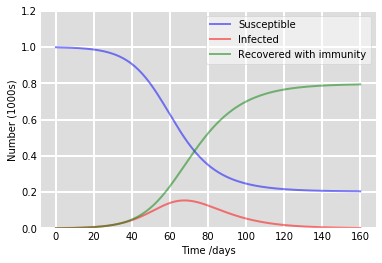

In [3]:
%matplotlib inline 

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()